#**Name**: Ankith Vijay

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import random


np.random.seed(42)
random.seed(42)

# Load the CIFAR10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Initialize an empty list to store our final training set
x_train_sampled = []
y_train_sampled = []

# We have 10 classes
num_classes = 10

# We want 1000 examples from each class
samples_per_class = 1000

# For each class, select 1000 examples randomly
for c in range(num_classes):
    # Get the indices of the examples belonging to this class
    idx = np.where(y_train_full == c)[0]
    
    # Randomly select 1000 examples
    idx_sampled = np.random.choice(idx, samples_per_class, replace=False)
    
    # Append these examples to our final training set
    x_train_sampled.extend(x_train_full[idx_sampled])
    y_train_sampled.extend(y_train_full[idx_sampled])

# Convert the lists to numpy arrays
x_train_sampled = np.array(x_train_sampled)
y_train_sampled = np.array(y_train_sampled)

print("x_train_sampled shape:", x_train_sampled.shape)
print("y_train_sampled shape:", y_train_sampled.shape)


170498071/170498071 [==============================] - 16s 0us/step
x_train_sampled shape: (10000, 32, 32, 3)
y_train_sampled shape: (10000, 1)


#Question 1:

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, Input, Dense, Flatten, AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):

    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation:
            x = Activation(activation)(x)
        x = conv(x)
    return x

def resnet_v1(input_shape, depth, num_classes=10):

    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, in [a])')
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)

    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0: 
                strides = 2 
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = Add()([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    model = Model(inputs=inputs, outputs=outputs)
    return model


model = resnet_v1(input_shape=(32, 32, 3), depth=20)
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])


In [4]:
from tensorflow import keras



y_train_sampled = keras.utils.to_categorical(y_train_sampled.squeeze(), num_classes)


y_test = keras.utils.to_categorical(y_test.squeeze(), num_classes)


history = model.fit(x_train_sampled, y_train_sampled, batch_size=64, epochs=100, validation_data=(x_test, y_test))



Epoch 1/100
157/157 [==============================] - 28s 33ms/step - loss: 1.9169 - accuracy: 0.3597 - val_loss: 2.6524 - val_accuracy: 0.2569
Epoch 2/100
157/157 [==============================] - 4s 26ms/step - loss: 1.5567 - accuracy: 0.4887 - val_loss: 1.7492 - val_accuracy: 0.4191
Epoch 3/100
157/157 [==============================] - 4s 23ms/step - loss: 1.3655 - accuracy: 0.5708 - val_loss: 1.6705 - val_accuracy: 0.4647
Epoch 4/100
157/157 [==============================] - 4s 26ms/step - loss: 1.2260 - accuracy: 0.6170 - val_loss: 1.9852 - val_accuracy: 0.4218
Epoch 5/100
157/157 [==============================] - 4s 28ms/step - loss: 1.1054 - accuracy: 0.6615 - val_loss: 2.0102 - val_accuracy: 0.4347
Epoch 6/100
157/157 [==============================] - 4s 23ms/step - loss: 0.9859 - accuracy: 0.7068 - val_loss: 2.1625 - val_accuracy: 0.4222
Epoch 7/100
157/157 [==============================] - 4s 23ms/step - loss: 0.8744 - accuracy: 0.7484 - val_loss: 2.6634 - val_accuracy

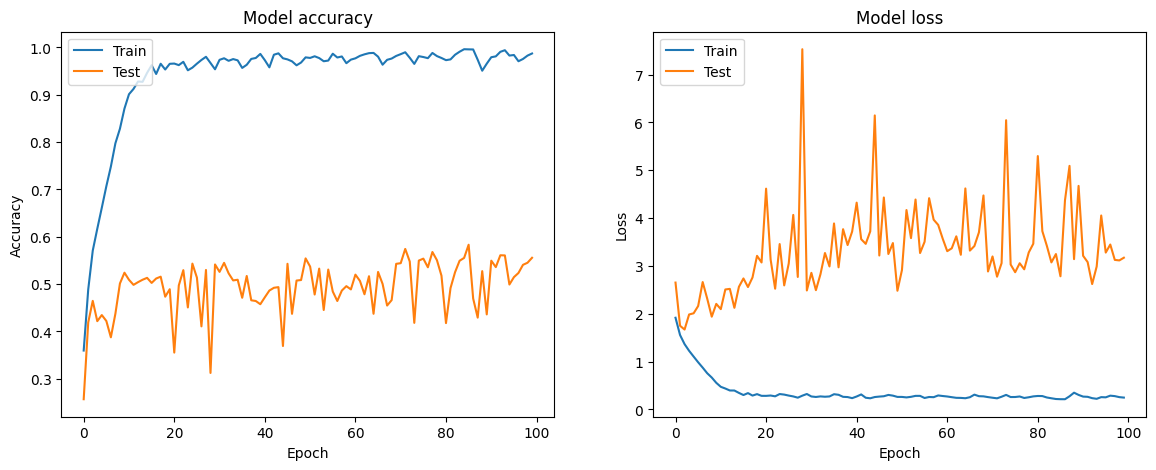

Highest achieved validation accuracy: 0.583299994468689


In [5]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



max_val_accuracy = max(history.history['val_accuracy'])
print(f'Highest achieved validation accuracy: {max_val_accuracy}')



#Question 2:

In [ ]:
def mixup_data(x, y, alpha=0.2):

    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.shape[0]
    index = np.random.permutation(batch_size)

    mixed_x = lam * x + (1 - lam) * x[index]
    mixed_y = lam * y + (1 - lam) * y[index]

    return mixed_x, mixed_y


In [ ]:
def mixup_generator(x, y, batch_size, alpha):

    while True:
        p = np.random.permutation(len(x))
        x, y = x[p], y[p]
        batch_idx = 0
        while batch_idx < len(x):
            batch_end = min(batch_idx + batch_size, len(x))
            batch_x, batch_y = x[batch_idx:batch_end], y[batch_idx:batch_end]
            batch_x, batch_y = mixup_data(batch_x, batch_y, alpha)
            yield batch_x, batch_y
            batch_idx = batch_end


In [ ]:
batch_size = 64
alpha = 0.2 


generator = mixup_generator(x_train_sampled, y_train_sampled, batch_size, alpha)


history = model.fit(generator, steps_per_epoch=len(x_train_sampled)//batch_size, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
156/156 [==============================] - 7s 32ms/step - loss: 0.9627 - accuracy: 0.8948 - val_loss: 1.7175 - val_accuracy: 0.5438
Epoch 2/100
156/156 [==============================] - 5s 29ms/step - loss: 0.8218 - accuracy: 0.9272 - val_loss: 1.6296 - val_accuracy: 0.5438
Epoch 3/100
156/156 [==============================] - 5s 32ms/step - loss: 0.7893 - accuracy: 0.9220 - val_loss: 1.5684 - val_accuracy: 0.5652
Epoch 4/100
156/156 [==============================] - 5s 29ms/step - loss: 0.7134 - accuracy: 0.9387 - val_loss: 1.6378 - val_accuracy: 0.5453
Epoch 5/100
156/156 [==============================] - 4s 27ms/step - loss: 0.8026 - accuracy: 0.9389 - val_loss: 1.5286 - val_accuracy: 0.5654
Epoch 6/100
156/156 [==============================] - 6s 37ms/step - loss: 0.7633 - accuracy: 0.9387 - val_loss: 1.5312 - val_accuracy: 0.5690
Epoch 7/100
156/156 [==============================] - 4s 27ms/step - loss: 0.7919 - accuracy: 0.9222 - val_loss: 1.6428 - val_accuracy:

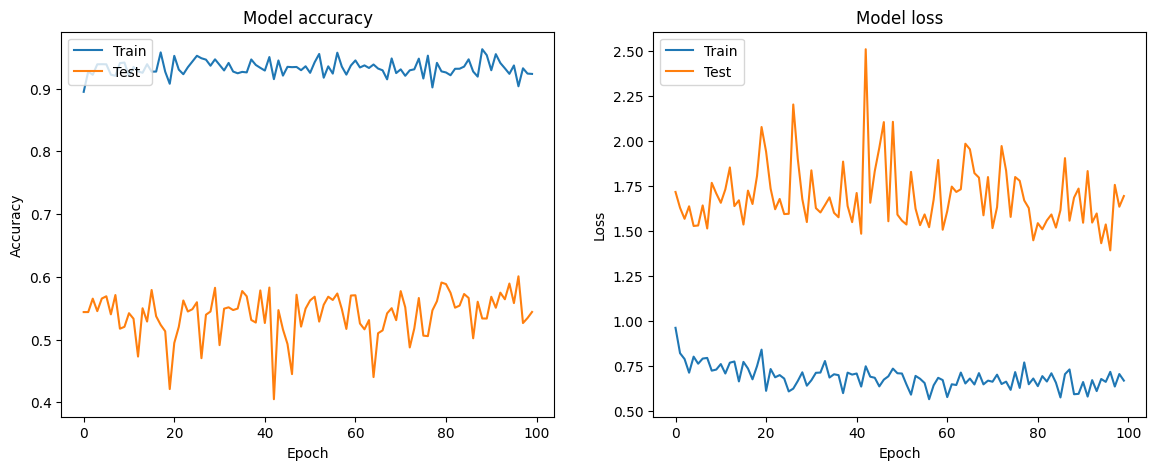

Highest achieved validation accuracy: 0.6007999777793884


In [ ]:

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


max_val_accuracy = max(history.history['val_accuracy'])
print(f'Highest achieved validation accuracy: {max_val_accuracy}')



In [ ]:
batch_size = 64
alpha = 0.4 


generator = mixup_generator(x_train_sampled, y_train_sampled, batch_size, alpha)


history = model.fit(generator, steps_per_epoch=len(x_train_sampled)//batch_size, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
156/156 [==============================] - 6s 39ms/step - loss: 0.9570 - accuracy: 0.8837 - val_loss: 1.5712 - val_accuracy: 0.5389
Epoch 2/100
156/156 [==============================] - 5s 31ms/step - loss: 0.8925 - accuracy: 0.8932 - val_loss: 1.4416 - val_accuracy: 0.5821
Epoch 3/100
156/156 [==============================] - 4s 27ms/step - loss: 0.8517 - accuracy: 0.9180 - val_loss: 1.3521 - val_accuracy: 0.6077
Epoch 4/100
156/156 [==============================] - 5s 31ms/step - loss: 0.8791 - accuracy: 0.9097 - val_loss: 2.1024 - val_accuracy: 0.4438
Epoch 5/100
156/156 [==============================] - 4s 27ms/step - loss: 0.8059 - accuracy: 0.9164 - val_loss: 1.6550 - val_accuracy: 0.5340
Epoch 6/100
156/156 [==============================] - 4s 27ms/step - loss: 0.8395 - accuracy: 0.9142 - val_loss: 1.9690 - val_accuracy: 0.4955
Epoch 7/100
156/156 [==============================] - 5s 30ms/step - loss: 0.8215 - accuracy: 0.9235 - val_loss: 1.5120 - val_accuracy:

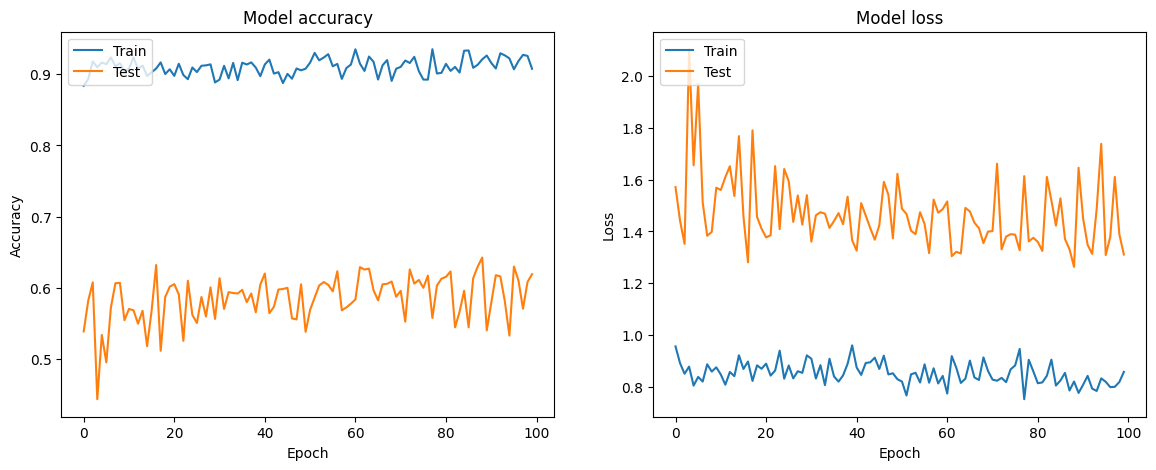

Highest achieved validation accuracy: 0.6427000164985657


In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



max_val_accuracy = max(history.history['val_accuracy'])
print(f'Highest achieved validation accuracy: {max_val_accuracy}')



#Question 3:

In [ ]:
import cv2

def cutout(img, size=16, n_squares=1):
    h, w, channels = img.shape
    new_img = img.copy()
    for _ in range(n_squares):
        y = np.random.randint(h)
        x = np.random.randint(w)
        y1 = np.clip(y - size // 2, 0, h)
        x1 = np.clip(x - size // 2, 0, w)
        y2 = np.clip(y + size // 2, 0, h)
        x2 = np.clip(x + size // 2, 0, w)
        new_img[y1:y2,x1:x2,:] = 0
    return new_img


In [ ]:
def cutout_generator(X_train, y_train, batch_size):
    while True:
        idx = np.random.permutation(X_train.shape[0])
        datagen = tf.keras.preprocessing.image.ImageDataGenerator()
        batches = datagen.flow(X_train[idx], y_train[idx], batch_size=batch_size, shuffle=False)
        idx0 = 0
        for batch in batches:
            idx1 = idx0 + batch[0].shape[0]

            yield np.array([
                cutout(img) if np.random.random() < 0.5 else img
                for img in batch[0]
            ]), batch[1]

            idx0 = idx1
            if idx1 >= X_train.shape[0]:
                break


In [ ]:
train_cutout = cutout_generator(x_train_sampled, y_train_sampled, batch_size=64)
history = model.fit(train_cutout, steps_per_epoch=len(x_train_sampled)//64, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
156/156 [==============================] - 6s 37ms/step - loss: 0.5974 - accuracy: 0.8465 - val_loss: 2.8580 - val_accuracy: 0.4786
Epoch 2/100
156/156 [==============================] - 6s 37ms/step - loss: 0.4963 - accuracy: 0.8822 - val_loss: 1.6302 - val_accuracy: 0.6272
Epoch 3/100
156/156 [==============================] - 5s 30ms/step - loss: 0.4475 - accuracy: 0.9013 - val_loss: 3.1107 - val_accuracy: 0.4853
Epoch 4/100
156/156 [==============================] - 5s 33ms/step - loss: 0.4061 - accuracy: 0.9163 - val_loss: 2.0964 - val_accuracy: 0.5806
Epoch 5/100
156/156 [==============================] - 4s 29ms/step - loss: 0.3818 - accuracy: 0.9237 - val_loss: 2.5540 - val_accuracy: 0.5406
Epoch 6/100
156/156 [==============================] - 5s 30ms/step - loss: 0.3677 - accuracy: 0.9306 - val_loss: 2.1647 - val_accuracy: 0.5924
Epoch 7/100
156/156 [==============================] - 5s 33ms/step - loss: 0.3674 - accuracy: 0.9301 - val_loss: 1.9307 - val_accuracy:

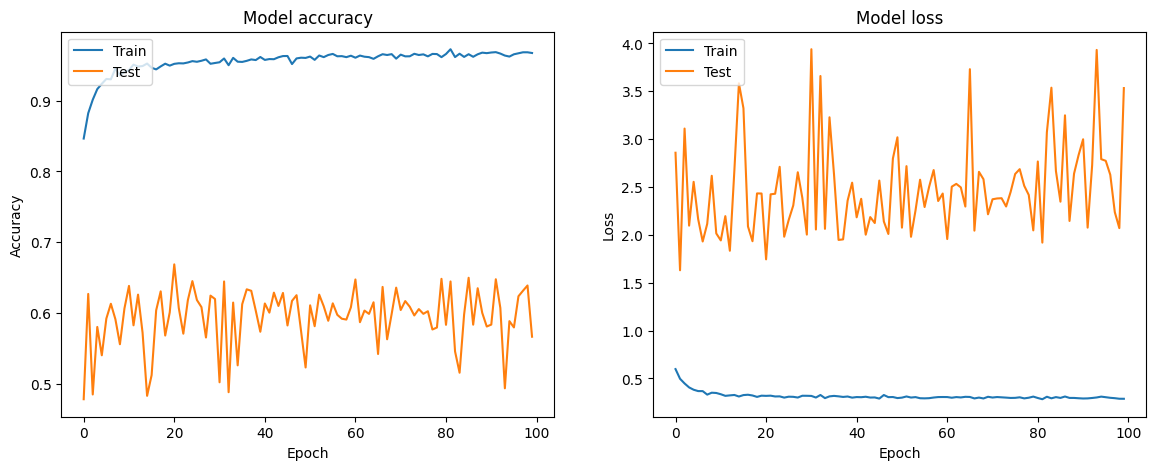

Highest achieved validation accuracy: 0.6689000129699707


In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

max_val_accuracy = max(history.history['val_accuracy'])
print(f'Highest achieved validation accuracy: {max_val_accuracy}')

#Question 4:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def standard_augmentation(x_train, y_train, batch_size):
    # Create the image data generator
    datagen = ImageDataGenerator(
        width_shift_range=4,  
        height_shift_range=4,  
        horizontal_flip=True  
    )

    # Generate augmented images
    augmented_images = datagen.flow(x_train, y_train, batch_size=batch_size)
    
    return augmented_images


In [ ]:
train_standard_aug = standard_augmentation(x_train_sampled, y_train_sampled, batch_size=64)
history = model.fit(train_standard_aug, steps_per_epoch=len(x_train_sampled) // 64, 
                    epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
156/156 [==============================] - 12s 76ms/step - loss: 1.1522 - accuracy: 0.6970 - val_loss: 1.2718 - val_accuracy: 0.6719
Epoch 2/100
156/156 [==============================] - 10s 67ms/step - loss: 0.8956 - accuracy: 0.7619 - val_loss: 1.1297 - val_accuracy: 0.7009
Epoch 3/100
156/156 [==============================] - 8s 53ms/step - loss: 0.8459 - accuracy: 0.7753 - val_loss: 1.0781 - val_accuracy: 0.7161
Epoch 4/100
156/156 [==============================] - 8s 50ms/step - loss: 0.7982 - accuracy: 0.7917 - val_loss: 1.0173 - val_accuracy: 0.7293
Epoch 5/100
156/156 [==============================] - 9s 57ms/step - loss: 0.7840 - accuracy: 0.7958 - val_loss: 1.0613 - val_accuracy: 0.7166
Epoch 6/100
156/156 [==============================] - 9s 58ms/step - loss: 0.7475 - accuracy: 0.8093 - val_loss: 1.0559 - val_accuracy: 0.7164
Epoch 7/100
156/156 [==============================] - 10s 64ms/step - loss: 0.7306 - accuracy: 0.8154 - val_loss: 1.0812 - val_accura

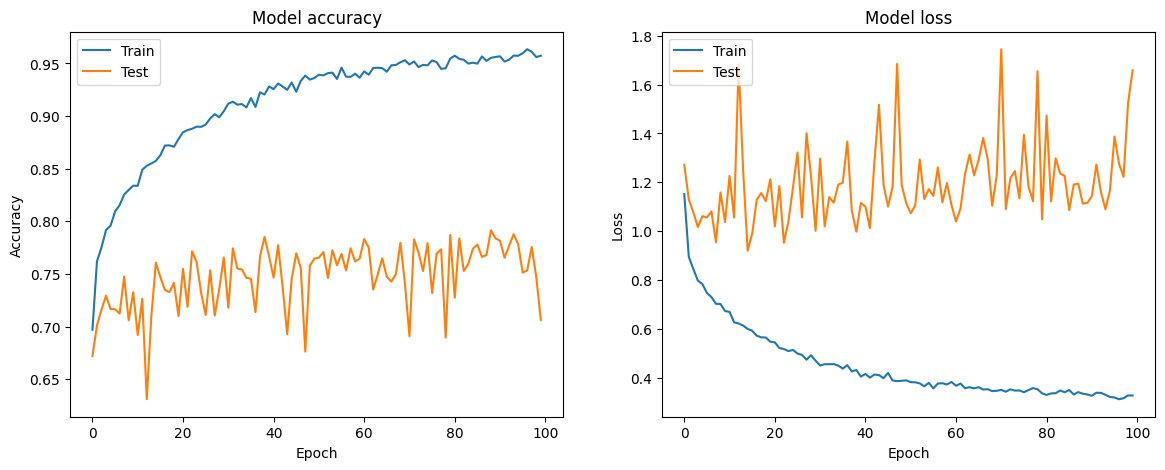

Highest achieved validation accuracy: 0.7914999723434448


In [ ]:

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



max_val_accuracy = max(history.history['val_accuracy'])
print(f'Highest achieved validation accuracy: {max_val_accuracy}')



#Question 5:

In [ ]:
def cutout(img, size=16, n_squares=1):
    h, w, channels = img.shape
    new_img = img.copy()
    for _ in range(n_squares):
        y = np.random.randint(h)
        x = np.random.randint(w)
        y1 = np.clip(y - size // 2, 0, h)
        x1 = np.clip(x - size // 2, 0, w)
        y2 = np.clip(y + size // 2, 0, h)
        x2 = np.clip(x + size // 2, 0, w)
        new_img[y1:y2,x1:x2,:] = 0
    return new_img

def mixup(img1, img2, label1, label2, alpha):
    t = np.random.beta(alpha, alpha)
    t = max(t, 1-t)
    img = img1 * t + img2 * (1-t)
    label = label1 * t + label2 * (1-t)
    return img, label

def all_augmentations(x_train, y_train, batch_size, alpha):
    datagen = ImageDataGenerator(
        width_shift_range=4,  # randomly shift images horizontally
        height_shift_range=4,  # randomly shift images vertically
        horizontal_flip=True  # randomly flip images
    )
    
    while True:
        idx = np.random.permutation(x_train.shape[0])
        batches = datagen.flow(x_train[idx], y_train[idx], batch_size=batch_size, shuffle=False)
        idx0 = 0
        for batch in batches:
            idx1 = idx0 + batch[0].shape[0]
            
            batch_images = np.array([
                cutout(img) if np.random.random() < 0.5 else img
                for img in batch[0]
            ])

            batch_labels = batch[1]
            
            idxs = np.random.choice(batch_images.shape[0], 2, replace=False)
            mixed_img, mixed_label = mixup(batch_images[idxs[0]], batch_images[idxs[1]], 
                                           batch_labels[idxs[0]], batch_labels[idxs[1]], alpha)
            
            batch_images[idxs[0]] = mixed_img
            batch_labels[idxs[0]] = mixed_label

            yield batch_images, batch_labels

            idx0 = idx1
            if idx1 >= x_train.shape[0]:
                break

# Using the function for model training
train_all_augmentations = all_augmentations(x_train_sampled, y_train_sampled, batch_size=64, alpha=0.4)
history = model.fit(train_all_augmentations, steps_per_epoch=len(x_train_sampled) // 64, 
                    epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
156/156 [==============================] - 11s 72ms/step - loss: 0.6801 - accuracy: 0.8512 - val_loss: 1.1357 - val_accuracy: 0.7627
Epoch 2/100
156/156 [==============================] - 10s 61ms/step - loss: 0.5548 - accuracy: 0.8825 - val_loss: 1.1128 - val_accuracy: 0.7698
Epoch 3/100
156/156 [==============================] - 10s 63ms/step - loss: 0.5368 - accuracy: 0.8924 - val_loss: 1.0617 - val_accuracy: 0.7829
Epoch 4/100
156/156 [==============================] - 11s 72ms/step - loss: 0.5251 - accuracy: 0.8968 - val_loss: 1.2143 - val_accuracy: 0.7520
Epoch 5/100
156/156 [==============================] - 9s 58ms/step - loss: 0.5353 - accuracy: 0.8927 - val_loss: 1.0569 - val_accuracy: 0.7819
Epoch 6/100
156/156 [==============================] - 10s 62ms/step - loss: 0.5129 - accuracy: 0.8983 - val_loss: 1.0690 - val_accuracy: 0.7700
Epoch 7/100
156/156 [==============================] - 11s 69ms/step - loss: 0.5337 - accuracy: 0.8917 - val_loss: 1.1071 - val_acc

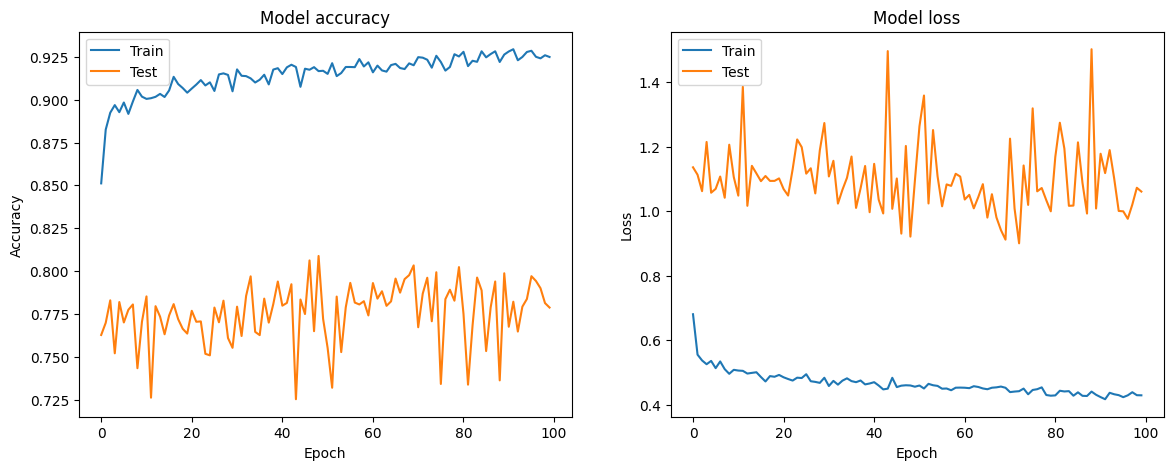

Highest achieved validation accuracy: 0.8087999820709229


In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
# loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
# print(f'Test accuracy: {accuracy}')

max_val_accuracy = max(history.history['val_accuracy'])
print(f'Highest achieved validation accuracy: {max_val_accuracy}')



Combing it did not result in a vast difference as you can see above. Nevertheless, combining various augmentation techniques can lead to better generalization and robustness of the model, which typically results in improved performance, especially when dealing with limited datasets.

# Question 6:
By adding minor modifications to the input data, data augmentation is a potent machine learning technique that increases the size of the training dataset. Without having to actively gather additional data, this can broaden the variety of the data available for training models. When working with image data, where augmentation techniques might range from straightforward operations like rotations and translations to more intricate ones like elastic deformations, this can be especially helpful.

The following illustrates how data augmentation might affect many facets of model training:

1. Data augmentation often increases test accuracy since it makes the model more generic. The model is better able to handle hidden differences in the test data because it was trained on a variety of samples.

2. Training Accuracy: Because the model is actually viewing more diverse and difficult instances early in training, training accuracy may be a little lower when data augmentation is applied.

3. Data augmentation may initially cause the convergence of optimization to take longer because the model must first learn from a larger variety of data. However, the final model is typically improved as a result. Additionally, data augmentation functions as a type of regularization, lowering overfitting, which can aid optimization over the long term.

4. Data augmentation produces a more difficult and diversified set of training instances, therefore the training loss may converge more slowly overall, especially in the beginning phases of training. However, the overall training loss should diminish over time as the model becomes more broad.

Yes, Test Accuracy is higher with augmentation and similary Training loss also coverges faster.